Creating basic API call from Alpaca

In [4]:
# importing requisite libraries
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import json

In [5]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [8]:
def get_dat_data(ticker):
    """Function to automatically pull closing price data from Alpaca"""
    """  example syntax: get_dat_data(["TSLA"])  """
    
    # Insert Personal Secret Keys (check .ENV to match syntax if error occurs)
    alpaca_api_key = os.getenv("APCA_API_KEY_ID")
    alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
    # Create the Alpaca API object
    alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version= "v2")
    
    # Backdating the Data to the first day of 2020
    back_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

    # Choosing the ticker we want (need to figure out how to make this the input)
    #ticker = ["TSLA"]
    
    # Using our assumption of 15min intervals for trading
    timeframe = "15Min"
    
    # Creating a dataframe with every characteristic of ticker Alpaca allows
    df_ticker = alpaca.get_barset(
        ticker,
        timeframe,
        start=back_date
        ).df
    
    # Selecting only the closing price for the ticker
    closing_price = pd.DataFrame()

    for time_period in ticker:
        closing_price[time_period] = df_ticker[time_period]["close"]

    closing_price.dropna()

    return closing_price.head()

In [12]:
get_dat_data(["JPM"])

,JPM
2020-01-02 09:30:00-05:00,139.670
2020-01-02 09:45:00-05:00,139.670
2020-01-02 10:00:00-05:00,139.640
2020-01-02 10:15:00-05:00,139.400
2020-01-02 10:30:00-05:00,139.535
...,...
2021-01-07 12:30:00-05:00,135.660
2021-01-07 12:45:00-05:00,136.100
2021-01-07 13:00:00-05:00,136.025
2021-01-07 13:15:00-05:00,135.620


In [17]:
def bollinger_band(get_dat_data):
    df_closing = pd.DataFrame(get_dat_data(["TSLA"]))

    # Window size
    bollinger_band_window = 20
    num_standard_deviation = 2

    # Calculate mean and standard deviation
    df_closing['bollinger_band_middle'] = df_closing['TSLA'].rolling(window=bollinger_band_window).mean()
    df_closing['bollinger_band_std'] = df_closing['TSLA'].rolling(window=bollinger_band_window).std()

    # Calculate upper bollinger band and lower bollinger band
    df_closing['bollinger_band_upper'] = df_closing['bollinger_band_middle'] + (df_closing['bollinger_band_std'] * num_standard_deviation)
    df_closing['bollinger_band_lower'] = df_closing['bollinger_band_middle'] - (df_closing['bollinger_band_std'] * num_standard_deviation)
    # Create signal for long
    df_closing['bollinger_band_long'] = np.where(df_closing['TSLA'] > df_closing['bollinger_band_upper'], 1.0, 0.0)
    df_closing.loc[df_closing['bollinger_band_long'] == 1.0].head()
    df_closing.dropna(inplace=True)
    # Plot Bollinger Bands with closing prices to visually see data
    return df_closing[['TSLA', 'bollinger_band_middle', 'bollinger_band_upper', 'bollinger_band_lower']].plot(figsize=(20,10), title='AAPL Bollinger Bands')

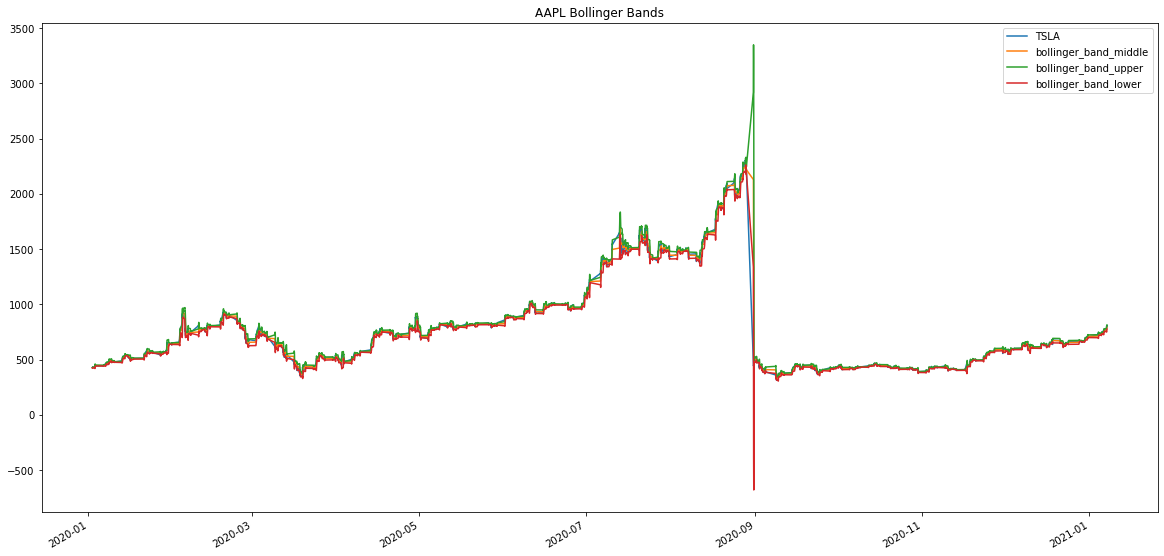

In [18]:
bollinger_band(get_dat_data)

ROUGH DRAFT FOR ALPACA API

In [3]:
# Bringing in alpaca api keys
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [4]:
# testing alpaca keys
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [10]:
# Defining timeframe and ticker parameters for my API pull
current_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()

ticker = ["JPM"]

timeframe = "15Min"

In [11]:
# Creating dataframe with every feature on Alpaca's get_barset
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=current_date
).df

df_ticker.head()

JPM                                 
                              open    high      low    close volume
2020-01-02 09:30:00-05:00  140.070  140.14  139.520  139.670  29953
2020-01-02 09:45:00-05:00  139.675  139.91  139.440  139.670  24343
2020-01-02 10:00:00-05:00  139.635  139.81  139.520  139.640  19021
2020-01-02 10:15:00-05:00  139.600  139.60  139.340  139.400  18856
2020-01-02 10:30:00-05:00  139.460  139.54  139.280  139.535  19695
...                            ...     ...      ...      ...    ...
2021-01-06 12:15:00-05:00  131.670  131.96  131.665  131.960  22992
2021-01-06 12:30:00-05:00  131.960  132.30  131.920  132.280  17191
2021-01-06 12:45:00-05:00  132.275  132.58  131.960  132.580  20470
2021-01-06 13:00:00-05:00  132.615  132.65  132.265  132.360  21793
2021-01-06 13:15:00-05:00  132.350  132.55  132.350  132.460   3561

[6857 rows x 5 columns]

In [17]:
# Creating a clsing price dataframe. Had to get a little weird with this code. 
closing_price = pd.DataFrame()

for time_period in ticker:
    closing_price[x] = df_ticker[time_period]["close"]

closing_price.head()


,JPM
2020-01-02 09:30:00-05:00,139.670
2020-01-02 09:45:00-05:00,139.670
2020-01-02 10:00:00-05:00,139.640
2020-01-02 10:15:00-05:00,139.400
2020-01-02 10:30:00-05:00,139.535
